In [1]:
print("ANN")

ANN


In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2904 - accuracy: 0.9164 - val_loss: 0.1432 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1429 - accuracy: 0.9580 - val_loss: 0.1029 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.0866 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0879 - accuracy: 0.9728 - val_loss: 0.0758 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0753 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.9795 - val_loss: 0.0777 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0602 - accuracy: 0.9799 - val_loss: 0.0715 - val_accur

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9804
Test accuracy: 0.9804


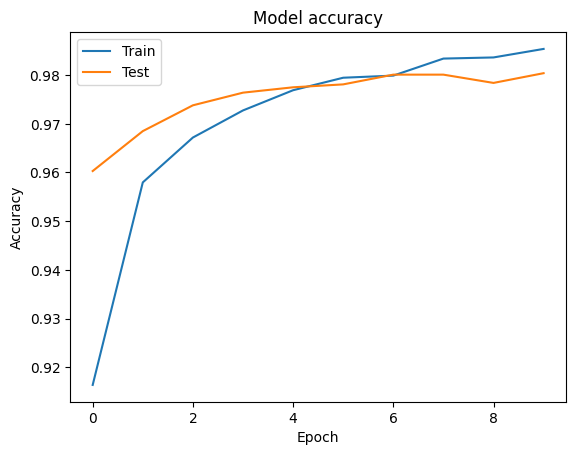

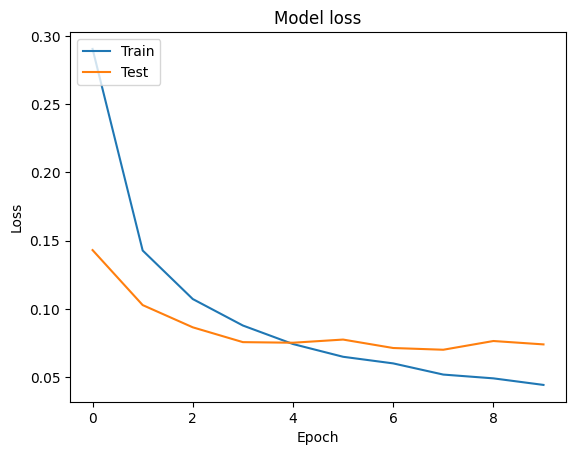

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9804
[0.07411891222000122, 0.980400025844574]


In [17]:
import numpy as np

In [18]:
p_test = model.predict(x_test)

print("Shape of predictions:", p_test.shape)

predicted_classes = tf.argmax(p_test, axis=1)
print("Shape of predicted classes:", predicted_classes.shape)

313/313 [==============================] - 1s 2ms/step
Shape of predictions: (10000, 10)
Shape of predicted classes: (10000,)


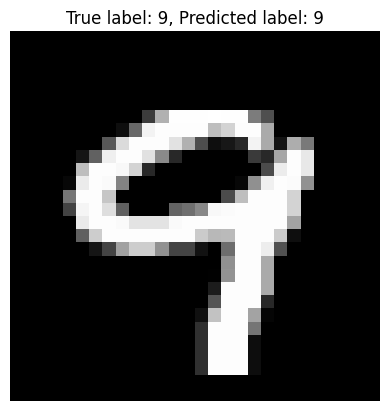

In [35]:
predicted_classes = np.argmax(p_test, axis=1)
crr_indices = np.where(predicted_classes == y_test)[0]
random_index = np.random.choice(crr_indices)
plt.imshow(x_test[random_index], cmap='gray')
plt.title(f"True label: {y_test[random_index]}, Predicted label: {predicted_classes[random_index]}")
plt.axis('off')
plt.show()

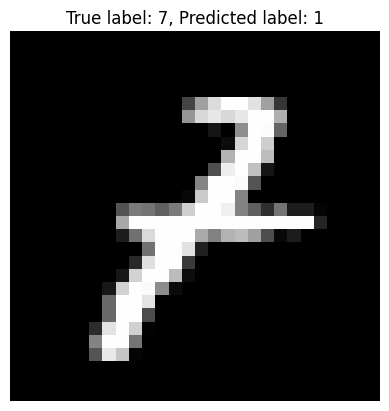

In [29]:
predicted_classes = np.argmax(p_test, axis=1)
wrong_indices = np.where(predicted_classes != y_test)[0]
random_index = np.random.choice(wrong_indices)
plt.imshow(x_test[random_index], cmap='gray')
plt.title(f"True label: {y_test[random_index]}, Predicted label: {predicted_classes[random_index]}")
plt.axis('off')
plt.show()

313/313 [==============================] - 1s 4ms/step


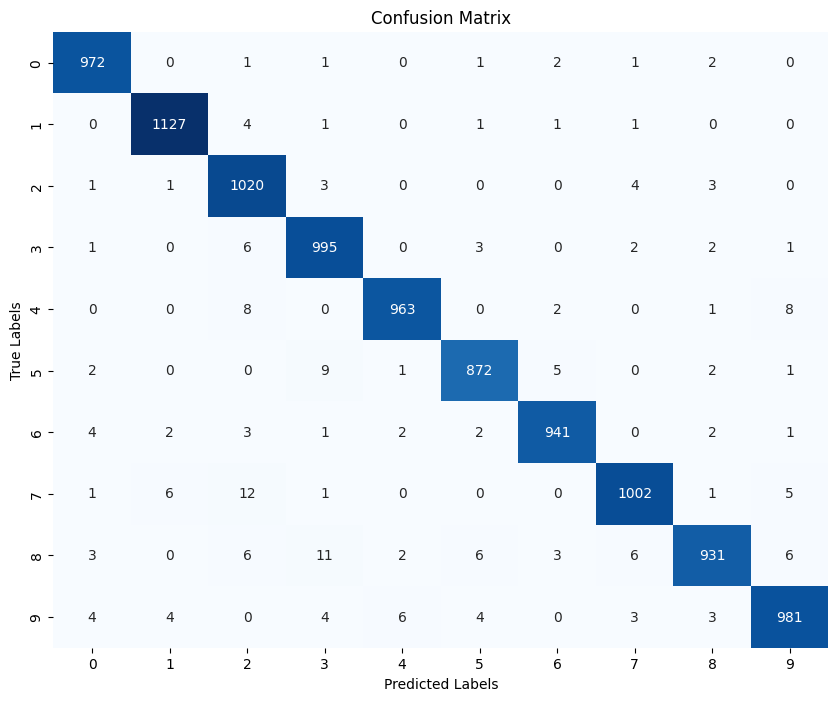

Labels with the most misclassifications:
True label: 1, Predicted label: 1, Misclassifications: 1127
True label: 2, Predicted label: 2, Misclassifications: 1020
True label: 7, Predicted label: 7, Misclassifications: 1002
True label: 3, Predicted label: 3, Misclassifications: 995
True label: 9, Predicted label: 9, Misclassifications: 981
True label: 0, Predicted label: 0, Misclassifications: 972
True label: 4, Predicted label: 4, Misclassifications: 963
True label: 6, Predicted label: 6, Misclassifications: 941
True label: 8, Predicted label: 8, Misclassifications: 931
True label: 5, Predicted label: 5, Misclassifications: 872


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

p_test = model.predict(x_test)
predicted_classes = np.argmax(p_test, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

most_misclassified = np.argsort(-conf_matrix.ravel())[:10]
print("Labels with the most misclassifications:")
for idx in most_misclassified:
    true_label = idx // conf_matrix.shape[1]
    pred_label = idx % conf_matrix.shape[1]
    print(f"True label: {true_label}, Predicted label: {pred_label}, Misclassifications: {conf_matrix[true_label, pred_label]}")